In [4]:
import numpy as np
import matplotlib.pyplot as plt 

 2. Consideremos la función $𝑓 : R → R$ dada por $𝑓 (𝑥) = 2𝑥 −1$. Sean $𝑋 ∼ U(0,1),𝑍 ∼ N(0,.25)$ e $𝑌 := 𝑓 (𝑋) +𝑍$.
 
    (a) Fijemos 𝑛 = 100. Tomar muestras $𝑥1,...,𝑥𝑛$ de 𝑋 y $𝜀1,...,𝜀𝑛$ de 𝑍 y calcular $𝑦𝑖 = 𝑓 (𝑥𝑖) +𝑧𝑖$, con 1 ≤ 𝑖 ≤ 𝑛. Realizar un ajuste lineal de la forma $𝑌 = 𝑋𝛽1 + 𝛽0 + 𝜖$ a partir de los samples $(𝑥1,𝑦1), . . ., (𝑥𝑛,𝑦𝑛)$ generados. Hacer un diagrama de dispersión con los samples y la estimación del modelo de regresión lineal.


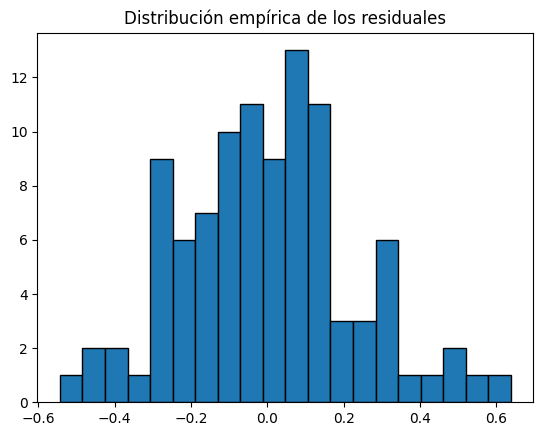

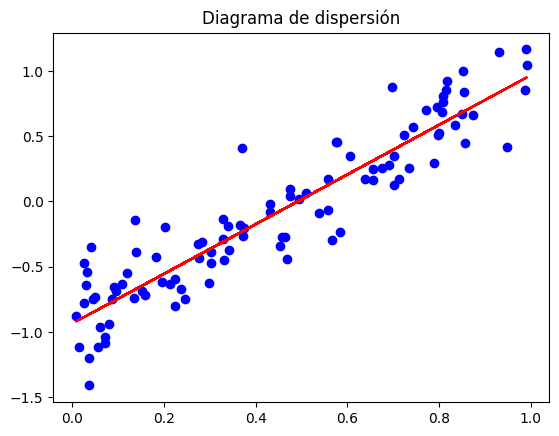

In [5]:
muestras_x = np.random.uniform(0,1,100)
muestras_z = np.random.normal(0,0.25,100)

muestras_y = 2*muestras_x - 1 + muestras_z

b1 = np.sum((muestras_x - np.mean(muestras_x))*(muestras_y - np.mean(muestras_y)))/np.sum((muestras_x - np.mean(muestras_x))**2)
b0 = np.mean(muestras_y) - b1 * np.mean(muestras_x)

residuales = muestras_y - (muestras_x*b1 + b0)

# Graficar el histograma de los residuales
plt.hist(residuales, bins=20, edgecolor='black')
plt.title('Distribución empírica de los residuales')
plt.show()

# Graficar el diagrama de dispersión
plt.scatter(muestras_x, muestras_y, color='blue')
plt.plot(muestras_x, muestras_x*b1 + b0, color='red')
plt.title('Diagrama de dispersión')
plt.show()



 (b) Repetir el paso anterior 𝑚 = 1000 veces para obtener 𝑚 pares de coeficientes $ \hat{\beta_0}$ y $\hat{\beta_1}$, es decir, 𝑚 samples de $ \hat{\beta_0}$ y 𝑚 samples de $ \hat{\beta_1}$. Visualizar la distribución de cada $ \hat{\beta_j}$ haciendo un histograma; visualizar la distribución conjunta haciendo un diagrama de dispersión con todas las estimaciones. Además, graficar todas las rectas de regresión estimadas.

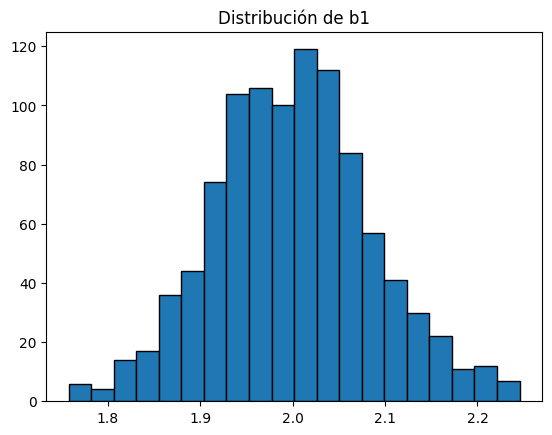

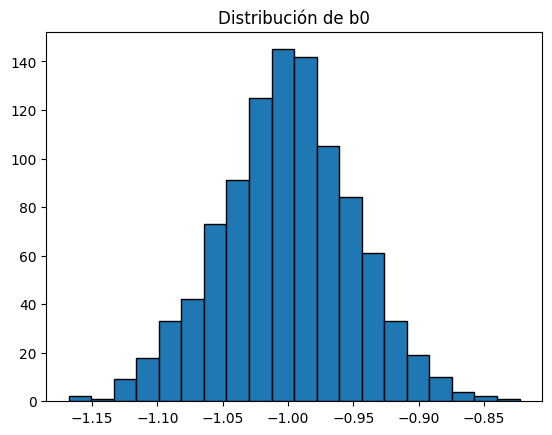

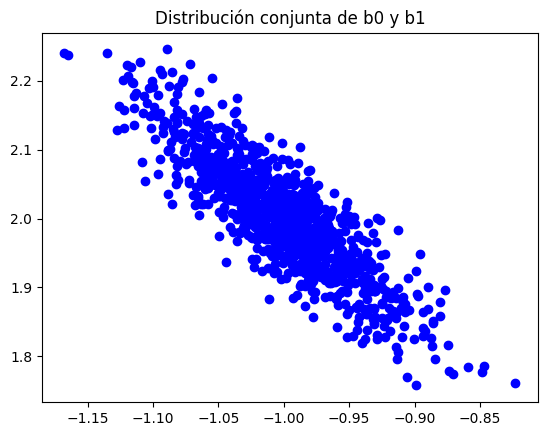

In [6]:
#repetir el proceso 1000 veces para obtener una distribución de los coeficientes  ˆ 𝛽0 y ˆ 𝛽1.
b1 = []
b0 = []
for i in range(1000):
    muestras_x = np.random.uniform(0,1,100)
    muestras_z = np.random.normal(0,0.25,100)
    muestras_y = 2*muestras_x - 1 + muestras_z
    b1.append(np.sum((muestras_x - np.mean(muestras_x))*(muestras_y - np.mean(muestras_y)))/np.sum((muestras_x - np.mean(muestras_x))**2))
    b0.append(np.mean(muestras_y) - b1[i] * np.mean(muestras_x))

plt.hist(b1, bins=20, edgecolor='black')
plt.title('Distribución de b1')
plt.show()

plt.hist(b0, bins=20, edgecolor='black')
plt.title('Distribución de b0')
plt.show()

#visualizar la distribución conjunta de los coeficientes b0 y b1
plt.scatter(b0, b1, color='blue')
plt.title('Distribución conjunta de b0 y b1')
plt.show()

c) Repetir el paso anterior para 𝑚 = 100 desde 𝑛 = 10 hasta 𝑛 = 1000. Graficar la media y la varianza de cada coeficiente $\hat{\beta}$ en función de 𝑛.

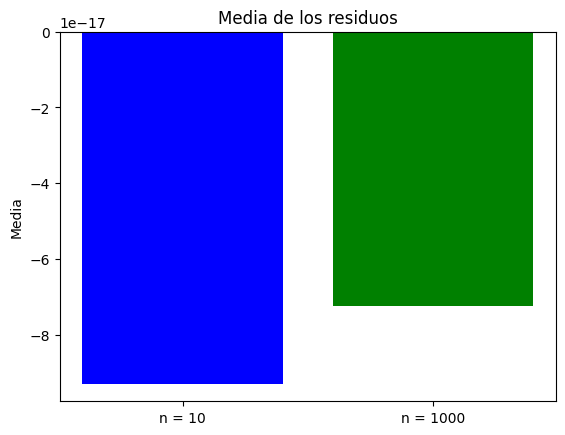

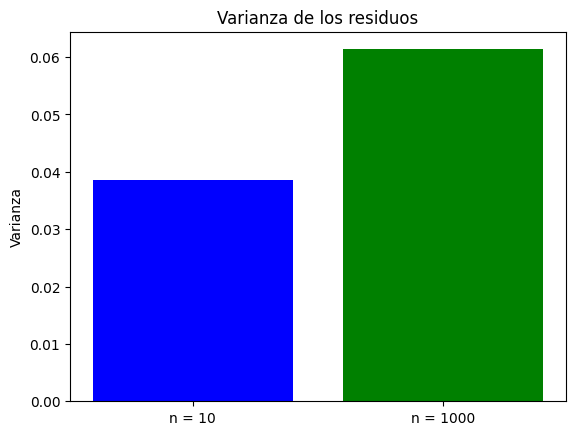

In [10]:
#n = 10
muestras_x_10 = np.random.uniform(0,1,10)
muestras_z_10 = np.random.normal(0,0.25,10)

muestras_y_10 = 2*muestras_x_10 - 1 + muestras_z_10

b1_10 = np.sum((muestras_x_10 - np.mean(muestras_x_10))*(muestras_y_10 - np.mean(muestras_y_10)))/np.sum((muestras_x_10 - np.mean(muestras_x_10))**2)
b0_10 = np.mean(muestras_y_10) - b1_10 * np.mean(muestras_x_10)

residuales_10 = muestras_y_10 - (muestras_x_10 *b1_10 + b0_10)

media_residuos_10 = np.mean(residuales_10)
varianza_residuales_10 = np.var(residuales_10)

#n = 1000
muestras_x_1000 = np.random.uniform(0,1,1000)
muestras_z_1000 = np.random.normal(0,0.25,1000)

muestras_y_1000 = 2*muestras_x_1000 - 1 + muestras_z_1000

b1_1000 = np.sum((muestras_x_1000 - np.mean(muestras_x_1000))*(muestras_y_1000 - np.mean(muestras_y_1000)))/np.sum((muestras_x_1000 - np.mean(muestras_x_1000))**2)
b0_1000 = np.mean(muestras_y_1000) - b1_1000 * np.mean(muestras_x_1000)

residuales_1000 = muestras_y_1000 - (muestras_x_1000 *b1_1000 + b0_1000)

media_residuos_1000 = np.mean(residuales_1000)
varianza_residuales_1000 = np.var(residuales_1000)

# Graficar la media de los residuos para n = 10 y n = 1000
plt.bar(['n = 10', 'n = 1000'], [media_residuos_10, media_residuos_1000], color=['blue', 'green'])
plt.title('Media de los residuos')
plt.ylabel('Media')
plt.show()

# Graficar la varianza de los residuos para n = 10 y n = 1000
plt.bar(['n = 10', 'n = 1000'], [varianza_residuales_10,varianza_residuales_1000], color=['blue', 'green'])
plt.title('Varianza de los residuos')
plt.ylabel('Varianza')
plt.show()
